In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, levene, mannwhitneyu, normaltest
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.weightstats import ztest

In [2]:
#### Load dataset
data = pd.read_csv('customer_data_TP2_전처리완료.csv')
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,"2022-01-08, 2022-01-20, 2022-03-23, 2022-06-12...",2022-12-08
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,2021-03-11,2021-06-18,2021-06-18
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,2021-06-18,2022-01-06,2022-01-06
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,2021-03-28,"2021-04-25, 2021-06-22, 2021-07-11, 2021-09-07...",2022-03-13
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,2021-05-22,"2021-07-02, 2021-08-30, 2021-12-09, 2022-01-04...",2022-04-22


In [3]:
#### Check format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   100000 non-null  int64 
 1   age                  100000 non-null  int64 
 2   gender               100000 non-null  object
 3   income               100000 non-null  int64 
 4   education            100000 non-null  object
 5   region               100000 non-null  object
 6   loyalty_status       100000 non-null  object
 7   purchase_frequency   100000 non-null  object
 8   purchase_amount      100000 non-null  int64 
 9   product_category     100000 non-null  object
 10  promotion_usage      100000 non-null  int64 
 11  satisfaction_score   100000 non-null  int64 
 12  first_purchase_date  100000 non-null  object
 13  purchase_dates       100000 non-null  object
 14  last_purchase_date   100000 non-null  object
dtypes: int64(6), object(9)
memory usage

In [4]:
#### Check values 
for x in data.columns: 
    print(x)
    print(data[x].values)

id
[     1      2      3 ...  99998  99999 100000]
age
[27 29 37 ... 29 31 35]
gender
['Male' 'Male' 'Male' ... 'Male' 'Female' 'Female']
income
[40682 15317 38849 ... 13222 40093 22249]
education
['Bachelor' 'Masters' 'Bachelor' ... 'College' 'Bachelor' 'College']
region
['East' 'West' 'West' ... 'West' 'West' 'West']
loyalty_status
['Gold' 'Regular' 'Silver' ... 'Regular' 'Regular' 'Silver']
purchase_frequency
['frequent' 'rare' 'rare' ... 'frequent' 'frequent' 'rare']
purchase_amount
[18249  4557 11822 ...  5152 16312  9426]
product_category
['Books' 'Clothing' 'Clothing' ... 'Clothing' 'Health' 'Health']
promotion_usage
[0 1 0 ... 0 1 0]
satisfaction_score
[6 6 6 ... 5 5 6]
first_purchase_date
['2021-12-22' '2021-03-11' '2021-06-18' ... '2021-06-17' '2021-07-28'
 '2021-05-08']
purchase_dates
['2022-01-08, 2022-01-20, 2022-03-23, 2022-06-12, 2022-06-16, 2022-07-02, 2022-09-18, 2022-11-01, 2022-11-14, 2022-11-30, 2022-12-08'
 '2021-06-18' '2022-01-06' ...
 '2021-06-27, 2021-07-11, 20

In [5]:
#### Check unique values
data.apply(lambda x: x.nunique())

id                     100000
age                        38
gender                      2
income                  40003
education                   4
region                      4
loyalty_status              3
purchase_frequency          3
purchase_amount         18902
product_category            7
promotion_usage             2
satisfaction_score         11
first_purchase_date       395
purchase_dates          50735
last_purchase_date        756
dtype: int64

In [6]:
#### Check null
data.isnull().sum()

id                     0
age                    0
gender                 0
income                 0
education              0
region                 0
loyalty_status         0
purchase_frequency     0
purchase_amount        0
product_category       0
promotion_usage        0
satisfaction_score     0
first_purchase_date    0
purchase_dates         0
last_purchase_date     0
dtype: int64

In [7]:
#### Remove duplicates
print(data.shape)
df = data.drop_duplicates(subset= 'id', keep= False)
print(df.shape)

(100000, 15)
(100000, 15)


In [8]:
df = data[['promotion_usage', 'purchase_amount', 'satisfaction_score']]
df.head()

,promotion_usage,purchase_amount,satisfaction_score
0,0,18249,6
1,1,4557,6
2,0,11822,6
3,0,4098,7
4,1,19685,5


In [9]:
data1 = df.copy()

In [10]:
# 프로모션 사용 여부에 따른 그룹 분리
group_0 = data1[data1['promotion_usage'] == 0]
group_1 = data1[data1['promotion_usage'] == 1]

In [11]:
print(len(group_0))
print(len(group_1))

69920
30080


In [12]:
# 정확한 분석을 위한 샘플링 작업 
min_sample_size = min(len(group_0), len(group_1))
np.random.seed(42)

group_0_sample = group_0.sample(n=min_sample_size, random_state=42)
group_1_sample = group_1.sample(n=min_sample_size, random_state=42)

In [13]:
# 샘플링된 데이터 병합
balanced_data = pd.concat([group_0_sample, group_1_sample])

In [14]:
# 변수 정규화 - promotion_usage는 이진 변수이기에, 정규화 과정 x
scaler = StandardScaler()
balanced_data[['purchase_amount', 'satisfaction_score']] = scaler.fit_transform(
    balanced_data[['purchase_amount', 'satisfaction_score']]
)

In [15]:
# 정규화된 변수
purchase_amount = balanced_data['purchase_amount']
satisfaction_score = balanced_data['satisfaction_score']

# 평균과 표준편차 확인
def check_mean_std(column, name):
    mean = column.mean()
    std = column.std()
    print(f"{name} 평균: {mean:.4f}, 표준편차: {std:.4f}")

check_mean_std(purchase_amount, "Purchase Amount")
check_mean_std(satisfaction_score, "Satisfaction Score")

Purchase Amount 평균: -0.0000, 표준편차: 1.0000
Satisfaction Score 평균: 0.0000, 표준편차: 1.0000


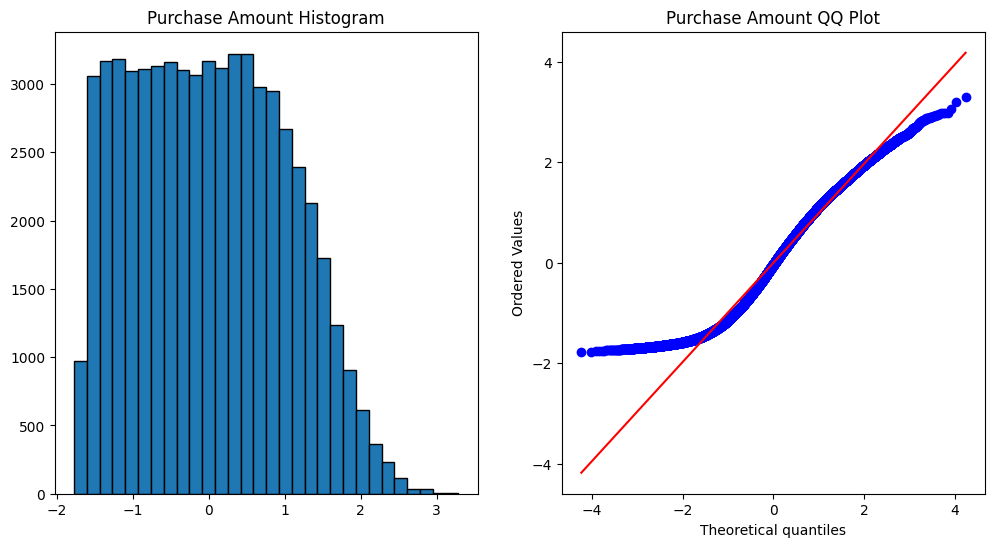

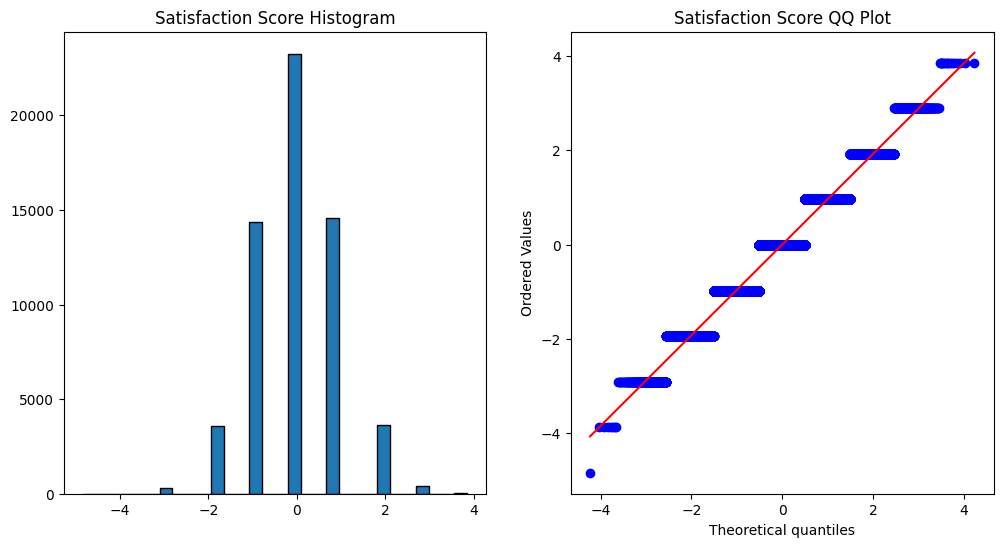

In [16]:
#정규분포 시각화
def plot_distribution(data, title):
    plt.figure(figsize=(12, 6))

    # 히스토그램
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{title} Histogram')

    # QQ 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'{title} QQ Plot')

    plt.show()

plot_distribution(purchase_amount, "Purchase Amount")
plot_distribution(satisfaction_score, "Satisfaction Score")

In [17]:
# t-test를 위한 그룹 재분리
group_0_purchase = balanced_data[balanced_data['promotion_usage'] == 0]['purchase_amount']
group_1_purchase = balanced_data[balanced_data['promotion_usage'] == 1]['purchase_amount']

group_0_satisfaction = balanced_data[balanced_data['promotion_usage'] == 0]['satisfaction_score']
group_1_satisfaction = balanced_data[balanced_data['promotion_usage'] == 1]['satisfaction_score']

In [18]:
# t-test
def perform_ttest(group_0, group_1, metric):
    stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
    print(f"\n== {metric} A/B 테스트 (t-test) 결과 ==")
    print(f"t-statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"'{metric}'에서 두 그룹 간 통계적으로 유의한 차이가 있습니다.\n")
    else:
        print(f"'{metric}'에서 두 그룹 간 통계적으로 유의한 차이가 없습니다.\n")

In [19]:
#결과 도출
# Purchase Amount A/B 테스트
perform_ttest(group_0_purchase, group_1_purchase, "Purchase Amount")

# Satisfaction Score A/B 테스트
perform_ttest(group_0_satisfaction, group_1_satisfaction, "Satisfaction Score")


== Purchase Amount A/B 테스트 (t-test) 결과 ==
t-statistic: -0.2829, p-value: 0.7773
'Purchase Amount'에서 두 그룹 간 통계적으로 유의한 차이가 없습니다.


== Satisfaction Score A/B 테스트 (t-test) 결과 ==
t-statistic: -0.0354, p-value: 0.9717
'Satisfaction Score'에서 두 그룹 간 통계적으로 유의한 차이가 없습니다.



In [20]:
#정규화하여, t-test를 진행하였지만, t-test의 경우, 표본 크기가 작고 분산을 모를때 사용.
#현재 데이터의 양이 10만개이기에 t-test 보단 z-test를 사용하는 것이 훨 좋을수도.

In [21]:
# Z-test 수행 함수
def perform_ztest(group_0, group_1, metric):
    stat, p_value = ztest(group_0, group_1, alternative='two-sided')
    print(f"\n== {metric} A/B 테스트 (Z-test) 결과 ==")
    print(f"Z-statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"'{metric}'에서 두 그룹 간 통계적으로 유의한 차이가 있습니다.\n")
    else:
        print(f"'{metric}'에서 두 그룹 간 통계적으로 유의한 차이가 없습니다.\n")

# Purchase Amount Z-test
perform_ztest(group_0_purchase, group_1_purchase, "Purchase Amount")

# Satisfaction Score Z-test
perform_ztest(group_0_satisfaction, group_1_satisfaction, "Satisfaction Score")


== Purchase Amount A/B 테스트 (Z-test) 결과 ==
Z-statistic: -0.2829, p-value: 0.7773
'Purchase Amount'에서 두 그룹 간 통계적으로 유의한 차이가 없습니다.


== Satisfaction Score A/B 테스트 (Z-test) 결과 ==
Z-statistic: -0.0354, p-value: 0.9717
'Satisfaction Score'에서 두 그룹 간 통계적으로 유의한 차이가 없습니다.



In [22]:
print(f"Group 0 샘플 수: {len(group_0_purchase)}")
print(f"Group 1 샘플 수: {len(group_1_purchase)}")

print("\n")

print("Purchase Amount 정규화 확인")
print(f"평균: {group_0_purchase.mean():.4f}, 표준편차: {group_0_purchase.std():.4f}")
print(f"평균: {group_1_purchase.mean():.4f}, 표준편차: {group_1_purchase.std():.4f}")

print("\nSatisfaction Score 정규화 확인")
print(f"평균: {group_0_satisfaction.mean():.4f}, 표준편차: {group_0_satisfaction.std():.4f}")
print(f"평균: {group_1_satisfaction.mean():.4f}, 표준편차: {group_1_satisfaction.std():.4f}")


Group 0 샘플 수: 30080
Group 1 샘플 수: 30080


Purchase Amount 정규화 확인
평균: -0.0012, 표준편차: 1.0011
평균: 0.0012, 표준편차: 0.9989

Satisfaction Score 정규화 확인
평균: -0.0001, 표준편차: 1.0039
평균: 0.0001, 표준편차: 0.9961
